# Convolutional Neural Networks
_Student 902011, Moleri Andrea, a.moleri@campus.unimib.it_

---

💡 Design and train a CNN with up to 7000 trainable parameters to obtain the best results on the MNIST dataset.

---

## Inspecting the Data

In order to build a set of Convolutional Neural Networks, it is first necessary to present and inspect the dataset we will be dealing with. In particular, we will use the MNIST dataset, extremely popular for image classification tasks, consisting of handwritten digits (0 through 9) represented as grayscale images. The dimensionality and distribution of the data are analyzed in the following code cell. The training set contains `60,000` samples, each represented as a `28x28` pixel image, which corresponds to the shape `(60000, 28, 28)` for `x_train`. The labels for these images are stored in `y_train`, which has a shape of `(60000,)`. Similarly, the test set contains `10,000 samples`, with corresponding dimensions `(10000, 28, 28)` for `x_test` and `(10000,)` for `y_test`.

The pixel intensity values range between `0` (black) and `255` (white), as indicated by the output of the following code cell. The average pixel intensity in the training set is `33.32`, with a standard deviation of `78.57`. This suggests that most pixels are closer to black, with a significant variation in brightness across images. The visualization of a single sample (label `5`) demonstrates the typical appearance of a digit in the dataset, rendered in grayscale. The distribution of labels in the training set is shown in the bar chart. Each label is evenly represented, with approximately `6000` samples per digit. This uniformity ensures that the dataset is well-suited for training machine learning models without bias toward any specific class. Lastly, the example images for each label can be useful to further understand the dataset’s content. These samples highlight variations in handwriting style, stroke thickness, and overall shape.

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


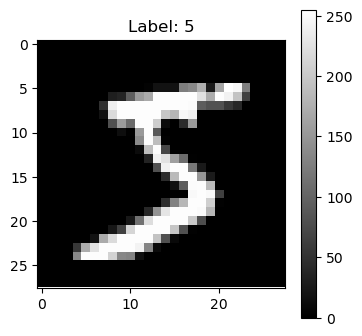

Descriptive statistics of x_train:
  Maximum value: 255
  Minimum value: 0
  Mean: 33.32
  Standard deviation: 78.57


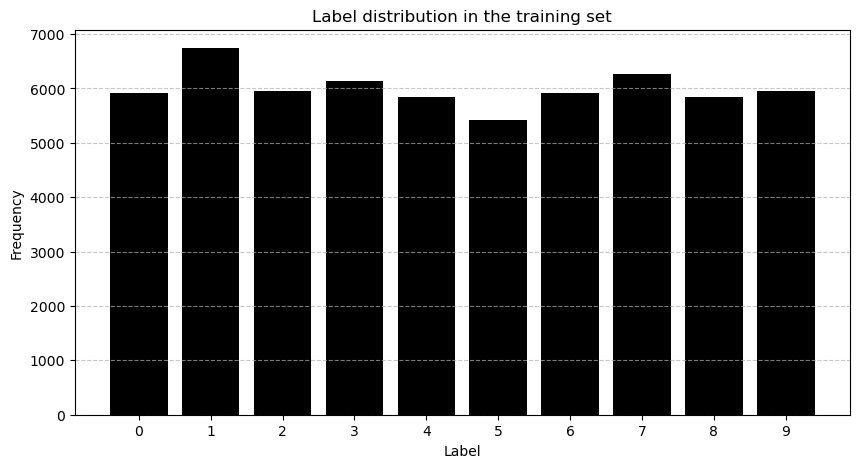

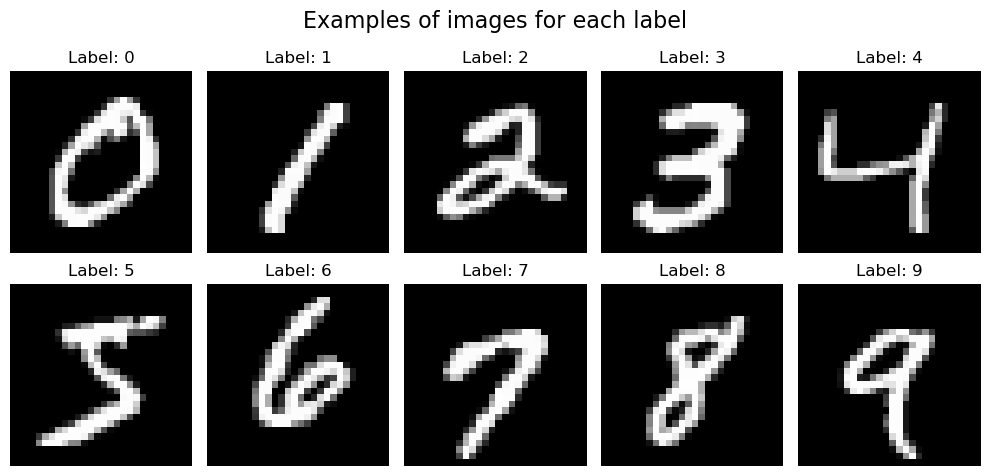

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset, consisting of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of the training and testing datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Visualize the first image in the training set
plt.figure(figsize=(4, 4))
plt.imshow(x_train[0], cmap='gray')  # Display the image in grayscale
plt.title(f"Label: {y_train[0]}")    # Show the corresponding label as the title
plt.colorbar()                       # Add a colorbar for intensity reference
plt.show()

# Display descriptive statistics for the training dataset
print("Descriptive statistics of x_train:")
print(f"  Maximum value: {np.max(x_train)}")           # Maximum pixel intensity
print(f"  Minimum value: {np.min(x_train)}")           # Minimum pixel intensity
print(f"  Mean: {np.mean(x_train):.2f}")               # Mean pixel intensity
print(f"  Standard deviation: {np.std(x_train):.2f}")  # Standard deviation of pixel intensities

# Compute the distribution of labels in the training set
unique, counts = np.unique(y_train, return_counts=True)

# Plot the frequency distribution of labels
plt.figure(figsize=(10, 5))
plt.bar(unique, counts, color='black')               # Bar chart of label frequencies
plt.title("Label distribution in the training set")  # Title of the plot
plt.xlabel("Label")                                  # Label for the x-axis
plt.ylabel("Frequency")                              # Label for the y-axis
plt.xticks(unique)                                   # Ensure all labels are displayed on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)        # Add gridlines to the y-axis
plt.show()

# Visualize examples of images for each label (0 through 9)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))                 # Create a 2x5 grid of subplots
fig.suptitle("Examples of images for each label", fontsize=16)  # Overall title
for i in range(10):                                             # Loop through labels 0 to 9
    idx = np.where(y_train == i)[0][0]                          # Find the first index for each label
    ax = axes[i // 5, i % 5]                                    # Determine subplot position
    ax.imshow(x_train[idx], cmap='gray')                        # Display the corresponding image
    ax.set_title(f"Label: {i}")                                 # Title showing the label
    ax.axis('off')                                              # Hide axis ticks and labels
plt.tight_layout()                                              # Adjust layout to avoid overlaps
plt.show()

### Preparing the Data

In this second code cell, a series of transformations to prepare the MNIST dataset for deep learning models (particularly convolutional neural networks) is applied. These steps help improve model performance and ensure compatibility with the neural network's architecture. First, we **normalize** the pixel values. The raw pixel values in the dataset range from `0` to `255`, so we scale them to the range `[0, 1]` by dividing by `255`. This reduces computational load and standardizes the input. After normalization, the pixel values are represented as floating-point numbers between `0.0` and `1.0`. Despite this transformation, the visual appearance of the images remains the same. Next, we **reshape** the images to match CNN requirements. The original images have the shape `(28, 28)`, but for CNNs, we add a **channel dimension** to indicate that the images are grayscale. Using `np.expand_dims`, we change the shape of both the training and testing datasets to `(60000, 28, 28, 1)` and `(10000, 28, 28, 1)`, respectively. This adjustment makes the data compatible with convolutional layers, which expect a **4-Dimensional** input _(samples, height, width, channels)_.

The next step is to apply **label encoding**, converting the labels from integer values (e.g., `0`, `1`, `2`, `3`, ...) into **one-hot encoded** vectors. Each label is transformed into a binary vector of length `10`, where the position corresponding to the true label is set to `1`, and the rest are set to `0`. For example, the label `5` becomes `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`. One-hot encoding is very important for multi-class classification tasks, enabling the model to output a probability distribution over the `10` possible classes. Finally, we visualize the results of preprocessing. A subplot shows the **normalized image** alongside its **pixel value distribution**. While the image itself appears unchanged, its pixel values now range from `0.0` to `1.0`. The pixel value histogram shows a prominent peak at `0.0`, representing black pixels, and a much smaller peak near `1.0`, representing areas in which the digits are actually written. The remaining pixel values represent varying shades of gray but occur less frequently, emphasizing that most of the image consists of either very dark or bright pixels.

New x_train shape: (60000, 28, 28, 1), x_test shape: (10000, 28, 28, 1)
One-hot encoded label of the first training example (label 5): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Example of normalization:


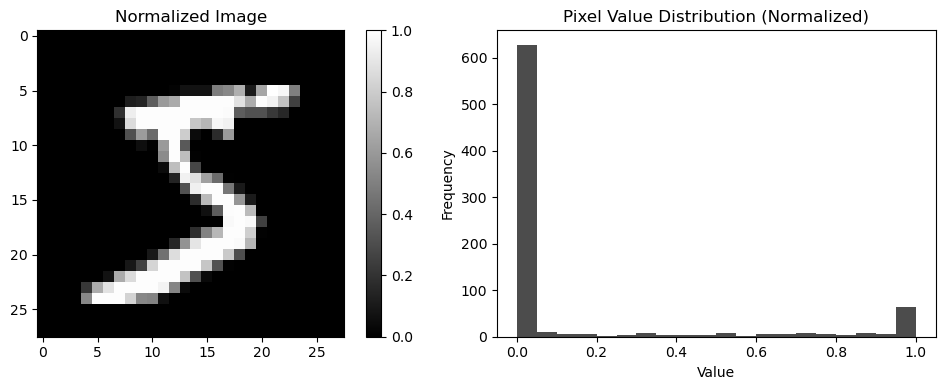

In [18]:
from tensorflow import keras

# Set a fixed random seed for reproducibility
keras.utils.set_random_seed(42)

# Normalize the pixel values to the range [0, 1] by dividing by 255
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Expand dimensions of the images to match the expected input shape for CNNs (adding a channel dimension)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Print the new shapes of the training and testing datasets after reshaping
print(f"New x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

# Convert the labels into one-hot encoded vectors for multi-class classification
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Print the one-hot encoded label of the first training example
print(f"One-hot encoded label of the first training example (label 5): {y_train[0]}")

# Example of normalization: visualizing the normalized image and its pixel value distribution
print("\nExample of normalization:")
plt.figure(figsize=(10, 4))

# Subplot 1: Display the first image in the training set after normalization
plt.subplot(1, 2, 1)
plt.imshow(x_train[0].squeeze(), cmap='gray')  # Use squeeze to remove the channel dimension for visualization
plt.title("Normalized Image")                  # Title for the image
plt.colorbar()                                 # Add a colorbar to show intensity values

# Subplot 2: Display a histogram of the pixel values for the normalized image
plt.subplot(1, 2, 2)
plt.hist(x_train[0].flatten(), bins=20, color='black', alpha=0.7)  # Flatten the image for histogram
plt.title("Pixel Value Distribution (Normalized)")                 # Title for the histogram
plt.xlabel("Value")                                                # Label for the x-axis
plt.ylabel("Frequency")                                            # Label for the y-axis

# Adjust layout to ensure proper spacing between the subplots
plt.tight_layout()
plt.show()

## Building the Network

To design a CNN that maximizes accuracy while respecting the constraint of `7000` trainable parameters, an incremental approach was chosen, starting from a basic model and progressively refining it. Each modification was justified by considering its potential impact on the network's ability to extract features, prevent overfitting, and optimize performance. Below, a detailed explanation of the design process is provided.

**Model 1: Basic Convolutional Neural Network**
The first model includes a single convolutional layer with `4` filters of size `3×3`. The use of a small number of filters keeps the parameter count low while enabling the network to begin extracting simple spatial patterns from the input images, such as edges or corners. This is followed by a max-pooling layer, which reduces the spatial dimensions of the feature maps, decreasing the computational complexity and helping prevent overfitting as a consequence. Afterward, a dense layer with `10` output neurons is used to classify the input into the `10` MNIST digit classes. A `50%` dropout rate is applied before the dense layer to further regularize the model by randomly deactivating half of the neurons during training. This initial configuration results in `6,810` trainable parameters, comfortably within the limit. However, this architecture is relatively simple, and its capacity to capture complex patterns is limited, which is likely to result in poor performance.

**Model 2: Enhanced CNN with an Additional Convolutional Layer**
To improve the model's feature extraction capability, a second convolutional layer with `8` filters was added. The first convolutional layer still has `4` filters, ensuring that the parameter count remains low. The second convolutional layer allows the network to learn more complex patterns and hierarchies of features from the initial feature maps. Each convolutional layer is followed by max-pooling, which helps reduce spatial dimensions while preserving critical information. This enhanced architecture strikes a balance between simplicity and improved representational power. It is expected to slightly outperform the baseline model by better capturing features.

**Model 3: Uniform Filter Count Across Convolutional Layers**
Building on Model 2, the aim was to create a more balanced architecture by using the same number of filters (`8`) in both convolutional layers. This modification increases the model's capacity to extract features consistently at both levels of the hierarchy, allowing the second layer to build upon a richer set of patterns from the first. By maintaining uniformity in filter count, the network gains more flexibility in capturing a wider range of features.

**Model 4: Improved Architecture with Three Convolutional Layers**
To further improve the model, a third convolutional layer was introduced. The first layer was expanded to `16` filters, while the second layer was reduced to `8` filters to control the parameter count. The third layer was set to `16` filters to enable deeper feature extraction. This architecture should allow the network to progressively learn a hierarchy of features, starting with simple patterns (e.g., edges) in the first layer, intermediate patterns (e.g., shapes) in the second, and more complex patterns (e.g., digit outlines) in the third. Max-pooling was applied after the second and third convolutional layers to control overfitting and reduce spatial dimensions. Despite the additional complexity, the trainable parameter count remains low at `6,498`, which is still within the allowed limit. This model should significantly improve the network’s representational capacity, and improve results as a consequence.

**Model 5: Optimized Regularization**
The final model builds on the architecture of Model 4 but includes a slight modification to the regularization strategy. While Model 4 used a `50%` dropout rate, this was reduced to `25%` in Model `5`. This adjustment was made to balance regularization and learning capacity. Empirically, and after some trial and error, this approach yielded the best results. A `50%` dropout rate, while effective in preventing overfitting, may overly constrain the network’s ability to learn complex patterns. By reducing the dropout rate, the network was allowed to retain more of its learned features during training, which is particularly useful in a relatively shallow architecture like this one. The rest of the architecture remains the same, with `16` filters in the first and third convolutional layers, and `8` filters in the second. The parameter count remains at `6,498`, ensuring compliance with the constraint. Model 5 represents the most optimized architecture. This architecture is expected to achieve the best results on the MNIST dataset, given the constraints. Training all models for `15` epochs with a batch size of `128` and comparing their performance will confirm the effectiveness of these incremental improvements.

In [19]:
from tensorflow.keras import layers

# Define the input shape for the models, corresponding to 28x28 grayscale images
input_shape = (28, 28, 1)

# -------------------------------------------------------------------------------
# Model 1: Basic Convolutional Neural Network (CNN) with minimal configuration
# - A single convolutional layer with 4 filters of size 3x3
# - A MaxPooling layer to reduce spatial dimensions
# - A Dropout layer for regularization (50% dropout rate)
# - A Dense output layer with 10 neurons for classification into 10 categories
model_1 = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),  # 4 filters
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),  # Output layer with 10 neurons
])

# Display the model's architecture
model_1.summary()

# -------------------------------------------------------------------------------
# Model 2: Enhanced CNN with an additional convolutional layer
# - Adds a second convolutional layer with 8 filters to improve feature extraction
# - Each convolutional layer is followed by MaxPooling to reduce dimensionality
# - Dropout for regularization (50% rate) and Dense output layer remain unchanged
model_2 = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),  # Additional 8 filters
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

# Display the model's architecture
model_2.summary()

# -------------------------------------------------------------------------------
# Model 3: Further improvement with uniform filter count across convolutional layers
# - Both convolutional layers now have 8 filters
# - Improves model's capacity to capture features at multiple layers
# - Regularization (Dropout) and Dense output layer remain the same
model_3 = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),  # Increased filter count
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

# Display the model's architecture
model_3.summary()

# -------------------------------------------------------------------------------
# Model 4: More advanced architecture with three convolutional layers and improved capacity
# - First layer with 16 filters, followed by 8 filters in the second layer
# - Third convolutional layer has 16 filters for deeper feature extraction
# - MaxPooling applied after second and third convolutional layers
# - Dropout remains at 50%, Dense output layer unchanged
model_4 = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),  # Increased filter count in the first layer
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),  # Third convolutional layer
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

# Display the model's architecture
model_4.summary()

# -------------------------------------------------------------------------------
# Model 5: The most advanced architecture with optimized regularization
# - Similar to Model 4, but Dropout rate reduced to 25% for less aggressive regularization
# - Preserves the same structure with 16-8-16 filters across the convolutional layers
# - Expected to perform best due to improved tradeoff between complexity and regularization
model_5 = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.25),  # Reduced dropout for improved performance
    layers.Dense(num_classes, activation="softmax"),
])

# Display the model's architecture
model_5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 13, 13, 4)         0         
 ng2D)                                                           
                                                                 
 flatten_20 (Flatten)        (None, 676)               0         
                                                                 
 dropout_20 (Dropout)        (None, 676)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                6770      
                                                                 
Total params: 6810 (26.60 KB)
Trainable params: 6810 (26.60 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

### Analysis and Comments on the Training Results

Below is a detailed analysis of each model's training behavior, validation performance, and overfitting tendencies, followed by a conclusion explaining why Model 5 is the best.

**Model 1: Basic Convolutional Neural Network**
Model 1 shows smooth convergence with a steadily decreasing training loss and increasing training accuracy over the epochs. It reaches around `92%` training accuracy, indicating that it learns the basic features somewhat well. The validation loss plateaus early and does not decrease significantly, while training accuracy lags behind validation accuracy by a noticeable margin (`~10%`). Test accuracy is `96.84%`, which is reasonable but reflects the model's limited capacity to capture complex features. In other words, the single convolutional layer limits the model’s feature extraction capability.

**Model 2: Enhanced CNN with an Additional Convolutional Layer**
The training loss decreases (slightly) faster compared to Model 1, and training accuracy reaches around `93%`. Validation accuracy improves slightly compared to Model 1 (`~97.3%`), and the validation loss decreases steadily, indicating better generalization. However, the gap between training and validation accuracy, even though is it reduced, persists. Test accuracy improves to `97.39%`, confirming that the additional convolutional layer enhances the model’s ability to extract more detailed features. The second convolutional layer enables the model to learn more complex patterns, resulting in better performance. 

**Model 3: Uniform Filter Count Across Convolutional Layers**
Training loss reduces consistently, and training accuracy exceeds `94%`, suggesting further improvement in learning capacity compared to Model 2. Validation accuracy improves to `~97.7%`, and validation loss decreases steadily. The gap between training and validation accuracy narrows compared to the previous models, showing improved generalization. Test accuracy increases to `97.71%`, a moderate improvement over Model 2. The uniform filter count across layers contributes to more balanced feature extraction, leading to higher accuracy. While the gap between the training and validation curves is still present, it is less pronounced than in Models 1 and 2.

**Model 4: Improved Architecture with Three Convolutional Layers**
The model shows, again, rapid convergence. Validation accuracy climbs to `~98.9%`. The gap between training and validation accuracy is now minimal, reflecting good generalization. Test accuracy improves again to `98.90%`, confirming the effectiveness of the deeper architecture. The addition of a third convolutional layer significantly enhances the model’s ability to extract detailed features, resulting in a major performance boost. 

**Model 5: Optimized Regularization**
Validation accuracy reaches `~99%`, similar to Model 4, and training loss is slightly lower, indicating efficient learning. Validation accuracy improves to `~99%`, and validation loss remains low, suggesting excellent generalization. The training-validation accuracy gap is now negligible, and it is the smallest it has ever been in this analysis. Test accuracy peaks at `99.03%`, with the lowest test loss among all models (`0.0300`). Model 5 achieves the best results due to its optimized dropout rate and balanced architecture. The reduced dropout allows the network to retain more learned features.

Each successive model demonstrates improved learning ability, as evidenced by faster convergence, lower training loss, and higher training accuracy. What is most striking at first glance is that, as we go forward with the iterations of the models, the gap between the training loss and validation loss curves, and the gap between the training accuracy and validation accuracy curves, becomes smaller. We start with model 1 with a huge gap of about `10%` between the two curves, up to model 5 with a gap so small as to be negligible. Overall, Model 5 achieves the highest test accuracy (`99.03%`) and the lowest test loss (`0.0300`), making it the best-performing model among the five.

Epoch 1/15
375/375 [==============================] - 6s 16ms/step - loss: 0.8368 - accuracy: 0.7557 - val_loss: 0.3137 - val_accuracy: 0.9171
Epoch 2/15
375/375 [==============================] - 6s 15ms/step - loss: 0.4003 - accuracy: 0.8794 - val_loss: 0.2458 - val_accuracy: 0.9337
Epoch 3/15
375/375 [==============================] - 5s 13ms/step - loss: 0.3404 - accuracy: 0.8971 - val_loss: 0.2094 - val_accuracy: 0.9448
Epoch 4/15
375/375 [==============================] - 5s 13ms/step - loss: 0.3057 - accuracy: 0.9073 - val_loss: 0.1865 - val_accuracy: 0.9502
Epoch 5/15
375/375 [==============================] - 5s 12ms/step - loss: 0.2849 - accuracy: 0.9137 - val_loss: 0.1699 - val_accuracy: 0.9557
Epoch 6/15
375/375 [==============================] - 4s 12ms/step - loss: 0.2668 - accuracy: 0.9191 - val_loss: 0.1589 - val_accuracy: 0.9582
Epoch 7/15
375/375 [==============================] - 4s 12ms/step - loss: 0.2570 - accuracy: 0.9218 - val_loss: 0.1510 - val_accuracy: 0.9602

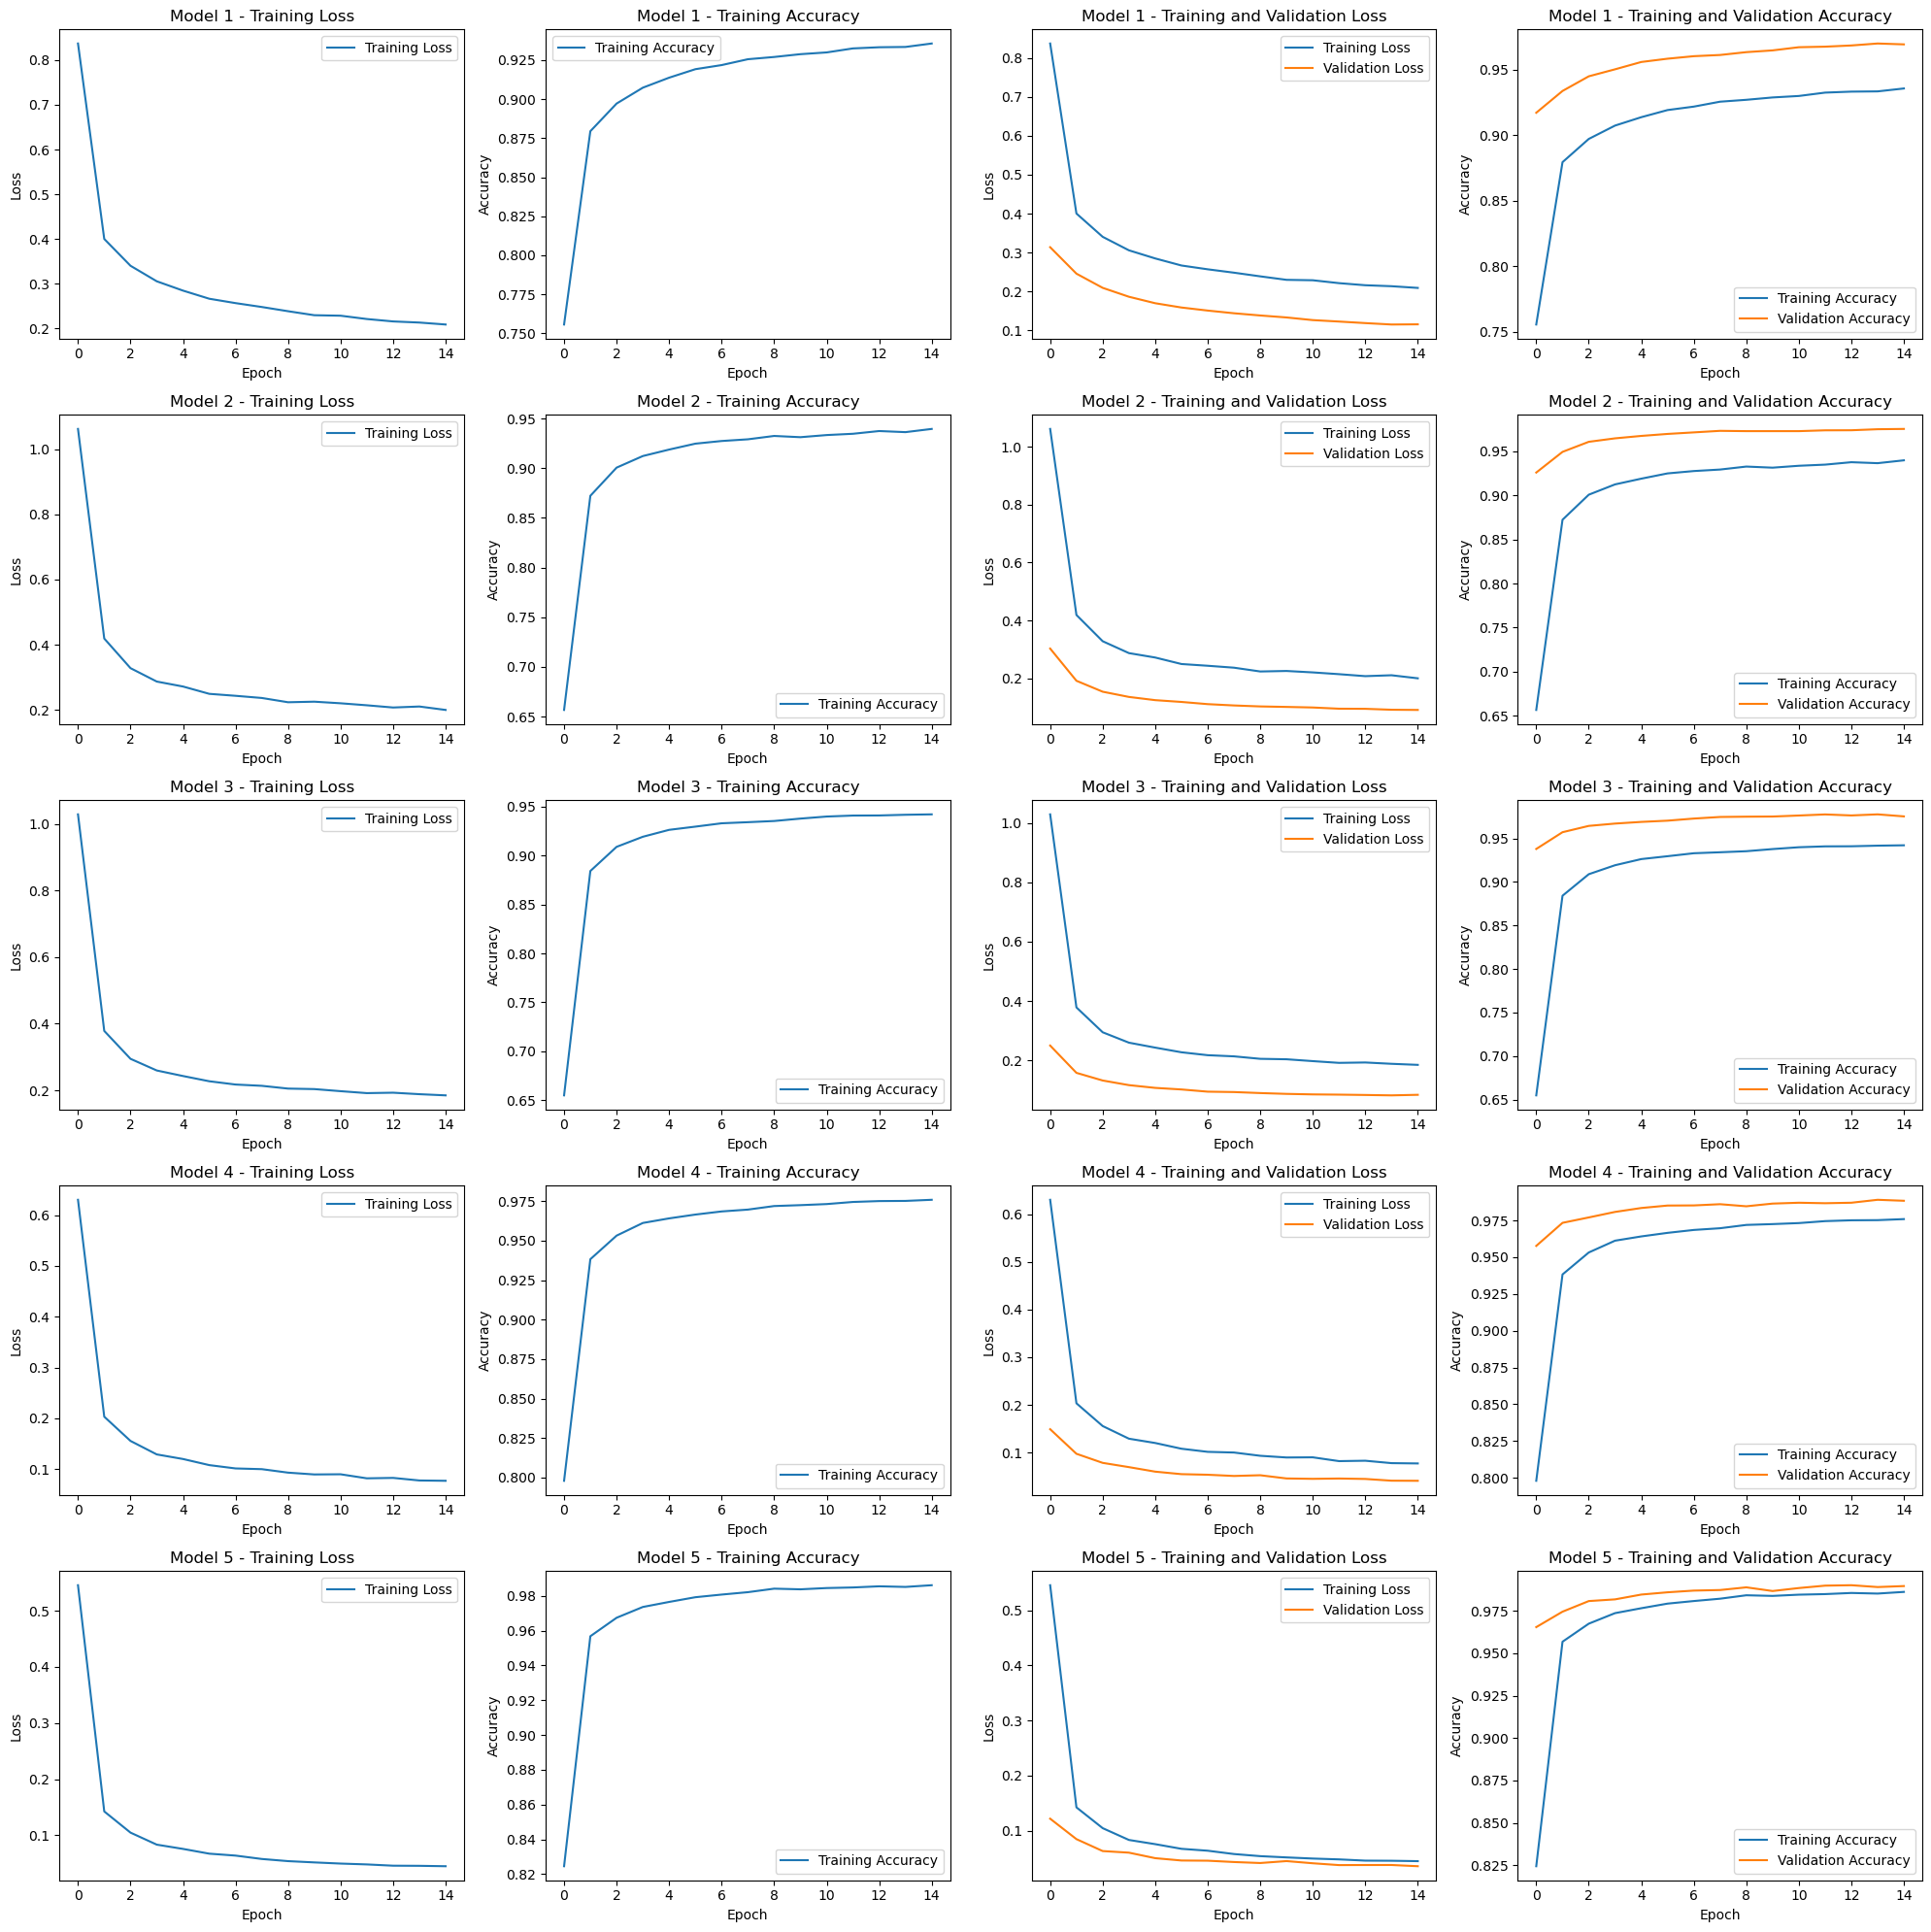

Test Results:

Model 1 - Test Loss: 0.1105, Test Accuracy: 0.9684
Model 2 - Test Loss: 0.0872, Test Accuracy: 0.9739
Model 3 - Test Loss: 0.0770, Test Accuracy: 0.9771
Model 4 - Test Loss: 0.0352, Test Accuracy: 0.9890
Model 5 - Test Loss: 0.0300, Test Accuracy: 0.9903


In [20]:
import matplotlib.pyplot as plt

# Define the batch size and the number of epochs for training
batch_size = 128
epochs = 15

# Function to plot the performance of the models during training
# This function creates plots for the loss and accuracy of both training and validation datasets
def plot_performance(history, ax, model_name, show_full=False):
    # Extract the training and validation metrics from the history object
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    # If the full performance plots are required, display both training and validation loss/accuracy
    if show_full:
        ax[0].plot(train_loss, label='Training Loss')
        ax[0].plot(val_loss, label='Validation Loss')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[0].set_title(f'{model_name} - Training and Validation Loss')
        ax[0].legend()
        
        ax[1].plot(train_acc, label='Training Accuracy')
        ax[1].plot(val_acc, label='Validation Accuracy')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_title(f'{model_name} - Training and Validation Accuracy')
        ax[1].legend()
    else:
        # If only the training metrics are required, display only the training loss/accuracy
        ax[0].plot(train_loss, label='Training Loss')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[0].set_title(f'{model_name} - Training Loss')
        ax[0].legend()

        ax[1].plot(train_acc, label='Training Accuracy')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_title(f'{model_name} - Training Accuracy')
        ax[1].legend()

# List of models to be evaluated
models = [model_1, model_2, model_3, model_4, model_5]

# Corresponding names of the models for labeling the plots
model_names = ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"]

# Create a grid of subplots for displaying the performance of each model
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# Lists to store the training history and test results for each model
histories = []
test_scores = []

# Loop through each model, train it, and evaluate its performance
for i, model in enumerate(models):
    # Compile the model with categorical crossentropy loss function and Adam optimizer
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    # Train the model on the training data, using 20% of the data for validation
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)

    # Plot the training and validation loss/accuracy for the current model
    plot_performance(history, axes[i, 2:4], model_names[i], show_full=True)
    plot_performance(history, axes[i, 0:2], model_names[i], show_full=False)

    # Evaluate the model's performance on the test data
    score = model.evaluate(x_test, y_test, verbose=0)
    test_scores.append((model_names[i], score[0], score[1]))

# Adjust the layout of the plots for better visualization
plt.tight_layout()
plt.show()

# Print the test results for all models, sorted by test accuracy in descending order
print("Test Results:\n")
for name, loss, acc in sorted(test_scores, key=lambda x: x[2], reverse=False):
    print(f"{name} - Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")